In [1]:
import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from gridworld import GridworldEnv

In [2]:
env = GridworldEnv()

In [3]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    V = np.zeros(env.nS)
    
    while True:
        delta = 0  # Initialize a variable to track the largest change in the value function in this iteration
        for s in range(env.nS):
            v = 0
            # Calculate the expected value from all possible actions in the current state
            for a, action_prob in enumerate(policy[s]):
                for prob, next_state, reward, done in env.P[s][a]:
                    v += action_prob * prob * (reward + discount_factor * V[next_state])
            
            # Calculate the absolute change in the value function for this state
            delta = max(delta, np.abs(v - V[s]))
            
            # Update the value function for the current state
            V[s] = v
        
        # If the largest change is smaller than the threshold (theta), the loop breaks
        if delta < theta:
            break
    
    return np.array(V)


In [4]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
v = policy_eval(random_policy, env)

In [5]:
# Test: Make sure the evaluated policy is what we expected
expected_v = np.array([0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)

In [6]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
v = policy_eval(random_policy, env)

# Print the evaluated value function
print("Value function:")
print(v)


Value function:
[  0.         -13.99993529 -19.99990698 -21.99989761 -13.99993529
 -17.9999206  -19.99991379 -19.99991477 -19.99990698 -19.99991379
 -17.99992725 -13.99994569 -21.99989761 -19.99991477 -13.99994569
   0.        ]


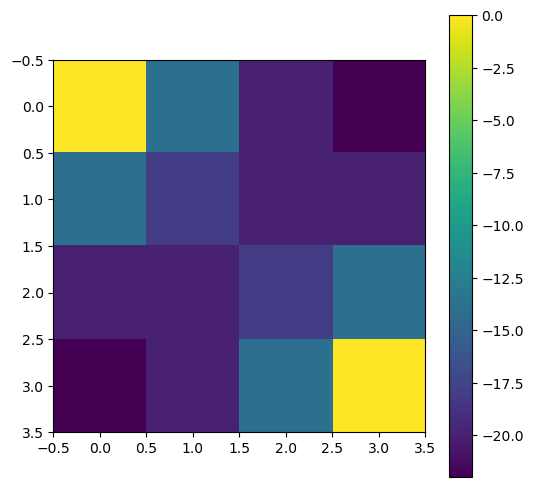

In [7]:
import matplotlib.pyplot as plt

# Assuming you have already computed the 'v' array
V = np.reshape(v, (4, 4))  # Assuming a 4x4 gridworld, adjust if necessary

plt.figure(figsize=(6, 6))
plt.imshow(V, cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()
